# ライブラリ

In [1]:
# !pip install librosa
# !pip install tqdm

In [2]:
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
import pandas as pd
import statistics as sta
import torch

print(librosa.__version__)
print(torch.__version__)


0.10.2.post1
2.2.2



# ファイル読み込み

In [3]:
# # 変数定義
sr = 44100 #サンプリング周波数

# #ファイルパスの指定
# train = "../raw_data/contacting_object/train_data/" #NASのデータ
# # audio_dir = "../Data_contacting_object/initial/FOLDER02" #ローカルデータ
# eval = "../raw_data/contacting_object/initial/FOLDER03/" 


# #学習用データの読み込み
# audio_dir = train
# subFolders = [f for f in os.listdir(audio_dir) if os.path.isdir(os.path.join(audio_dir, f))]
# subFolders = sorted(subFolders) #昇順に並び替え

# #ファイル読み込み
# # originDatasに音声データを格納していく
# originDatas = []
# for subFolder in subFolders:
#     filePath = audio_dir+"/"+subFolder+"/"+subFolder+"_Tr1.WAV"
#     originData, sr = librosa.load(filePath, sr = sr)
#     originDatas.append(originData)

# #評価用データの読み込み
# folderPath = eval
# subFolders = [f for f in os.listdir(folderPath) if os.path.isdir(os.path.join(folderPath, f))]
# subFolders = sorted(subFolders) #昇順に並び替え

# #ファイル読み込み
# # originDatas_eに音声データを格納していく
# originDatas_e = []
# for subFolder in subFolders:
#     filePath = folderPath+"/"+subFolder+"/"+subFolder+"_Tr1.WAV"
#     originData_e, sr = librosa.load(filePath, sr = sr)
#     originDatas_e.append(originData_e)


# #1データから30試行をトリミングを22パターン分行い，soundDatasetに格納する
# # soundDatasetの構造：[パターン(10)][試行(50)][サンプリングデータ(66150)]

# flag_amp = 0.1 #各試行の合図を検知する基準振幅
# trimSkip = int(sr*0.4)
# trimTime = int(sr*1.5)#1試行あたりのデータ長
# dataNum = 50
# trial = 0
# soundDataset =([])

# while trial <len(originDatas):
#     index = 0
#     trimDatas = ([]) #1データ(30試行)分のトリミングデータのリストを初期化
#     originData = np.array(originDatas[trial])
#     while index <len(originData):
#         if originData[index] >= flag_amp:
#             trimData = np.array(originData[index+trimSkip:index+trimTime+trimSkip]) #trim_dataにそのindexからindex+trimTimeのデータを格納する
#             trimDatas = np.append(trimDatas ,trimData, axis=0)  #trimDatasに追加する
#             index += trimTime
#         else:
#             index +=1
#         if len(trimDatas) >=dataNum*trimTime:
#             break
#     soundDataset = np.append(soundDataset,np.array(trimDatas),axis=0)
#     trial += 1

# soundDataset = soundDataset.reshape(len(originDatas),dataNum,trimTime)

# print(soundDataset.shape)

# import pickle
# f = open('soundDataset.pickle','wb')
# pickle.dump(soundDataset,f)

In [6]:
import pickle
f = open('soundDataset_20240619.pickle','rb')
soundDataset = pickle.load(f)

In [7]:
#object層
objLabel = [
    "y-shirt", 
    "jeans", 
    "sweatshirt", 

    "blanket", 
    "bedquilt", 
    "pillow", 
       
    "mousepad", 
    "chair", 
    "sofa", 
    
    "thick-Book", 
    "thin-Book", 
    "cardboard", 

    "metal-desk", 
    "laptop", 
    "alumi-rack", 
    
    "wood-desk", 
    "wood-shelf", 
    "floor", 
    
    "pla-Case", 
    "pla-Container", 
    "pla-Shelf"
]
objNum= []

#material層
matLabel = [
    "clothing",
    "bedding", 
    "memory-foam", 
    "paper", 
    "metal", 
    "wood", 
    "plastic"
]

matNum = [0,1,2,3,4,5,6]

#soft-hard層
shLabel = [
    "soft",
    "hard",
]

shNum = [0,1]





### スペクトログラムの描写

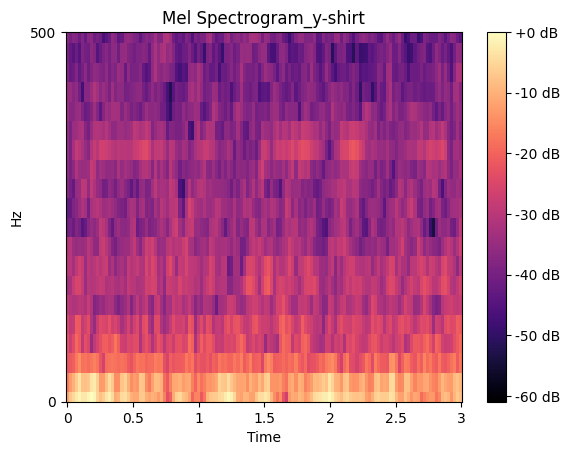

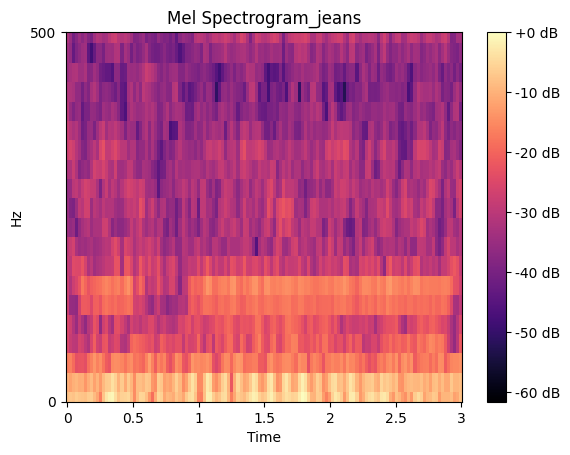

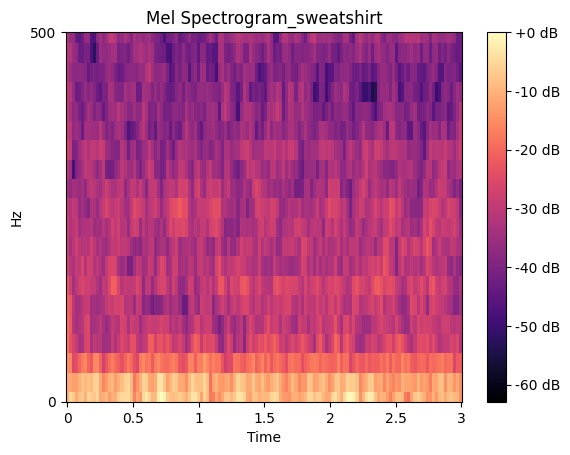

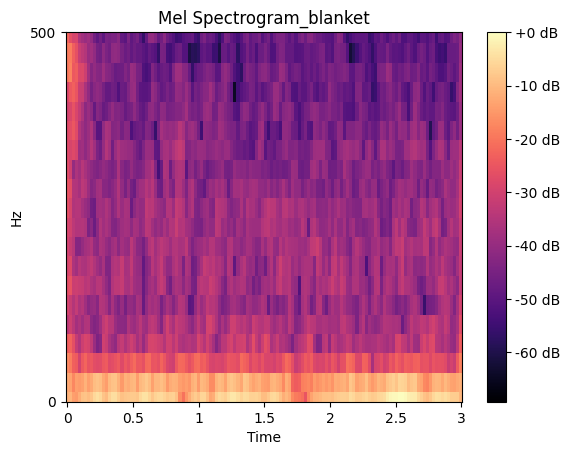

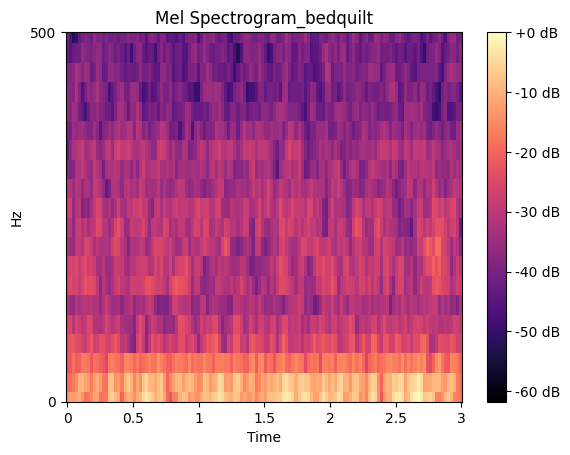

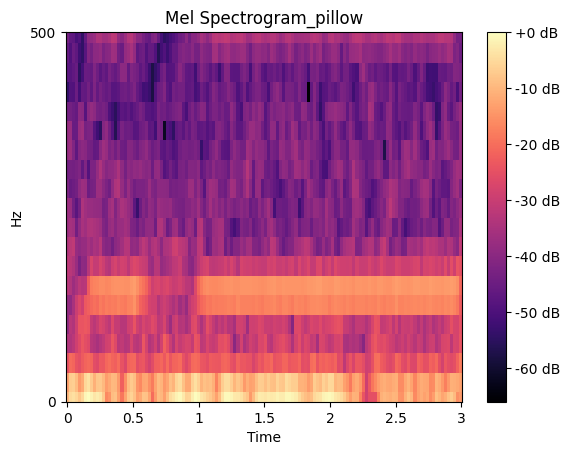

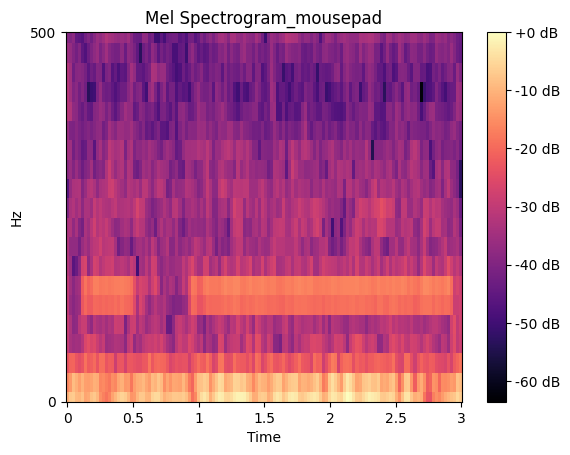

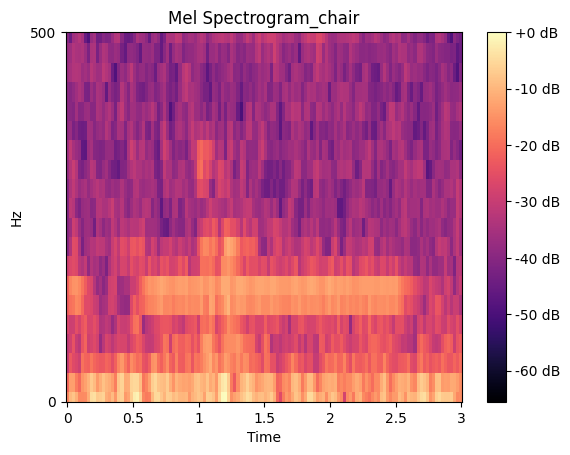

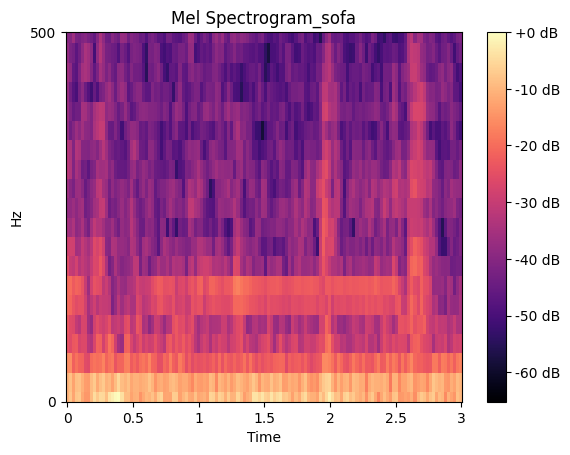

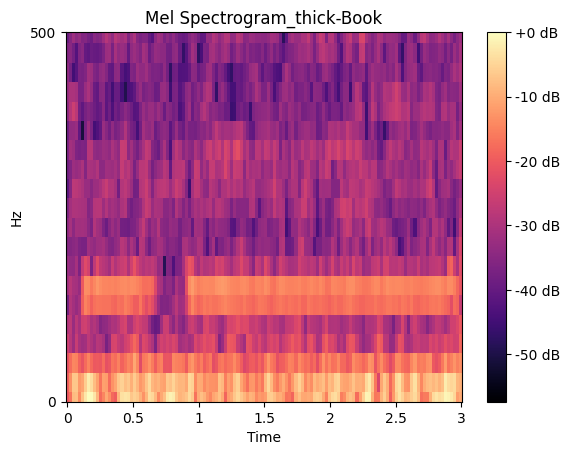

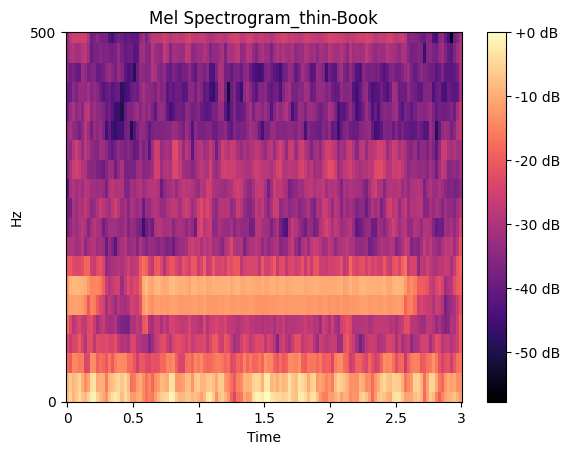

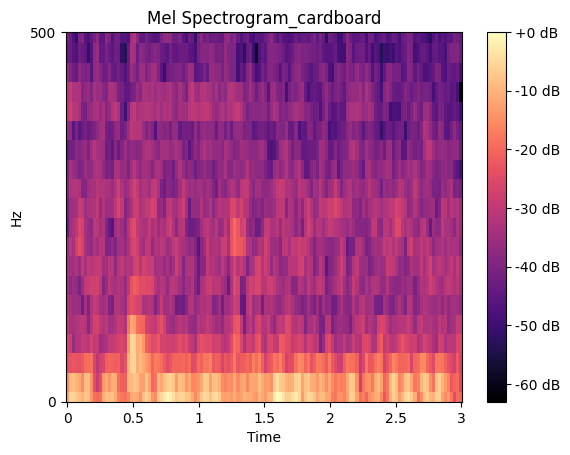

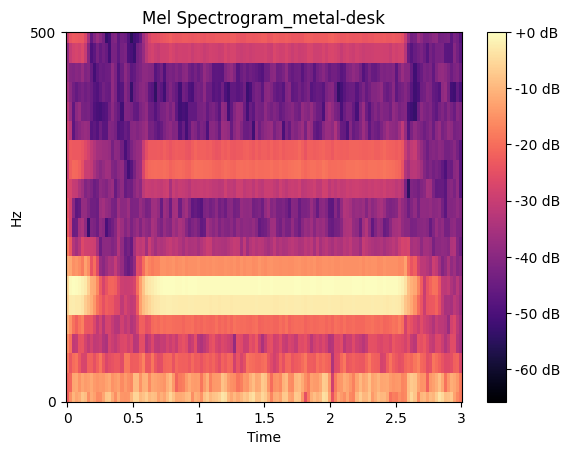

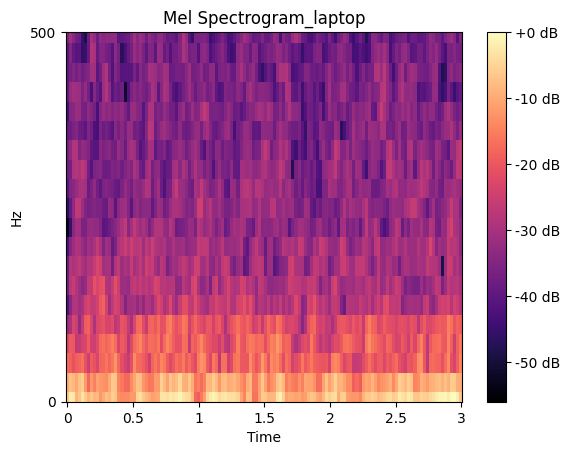

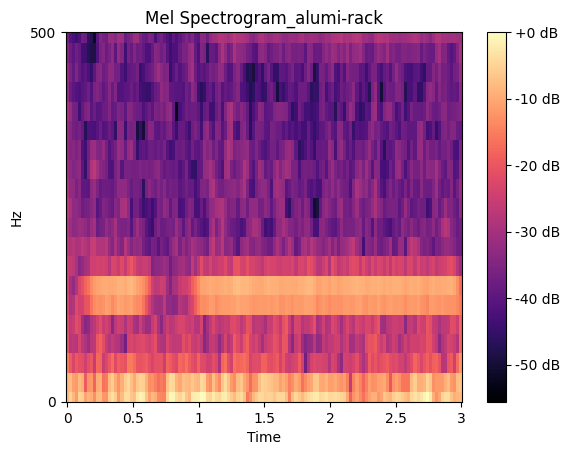

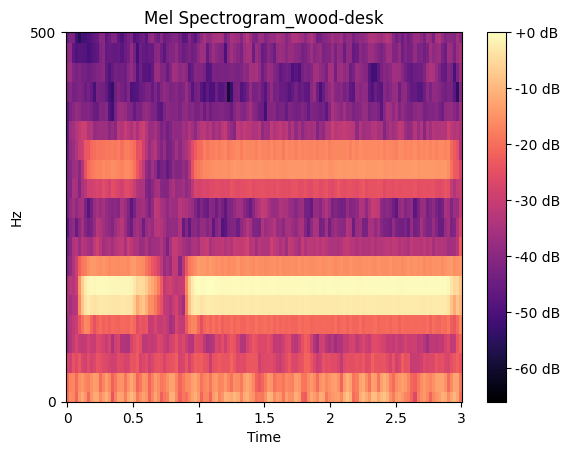

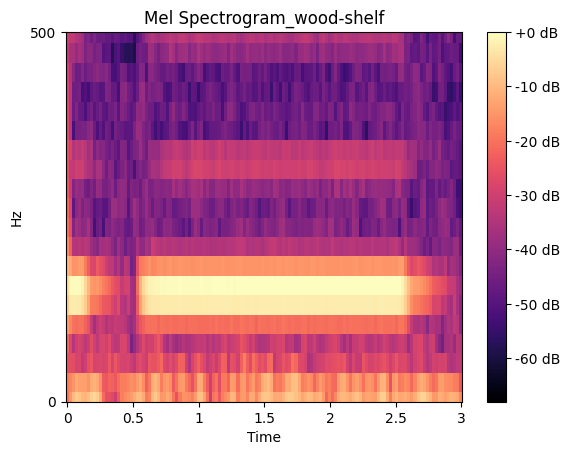

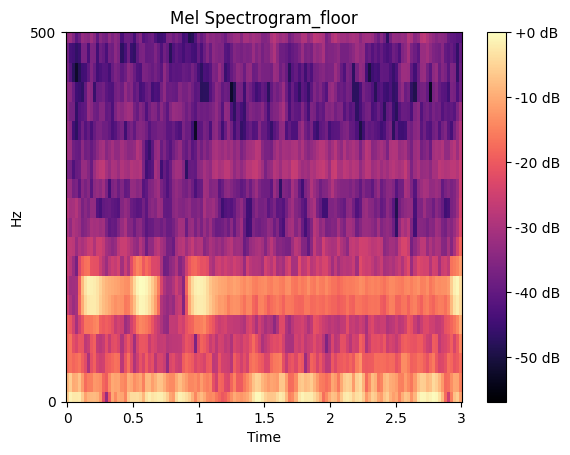

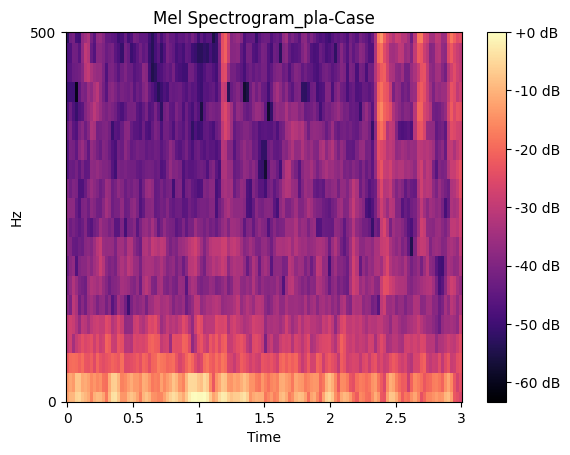

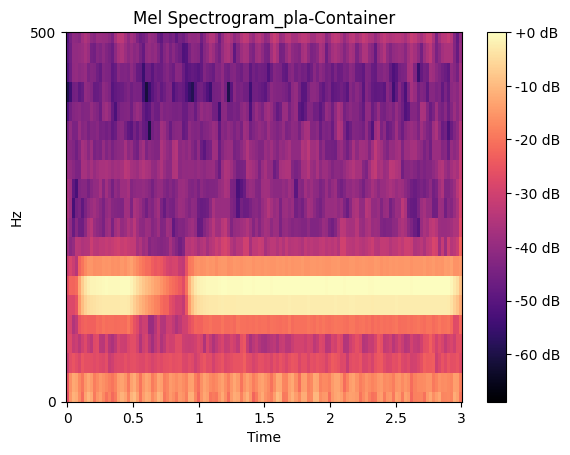

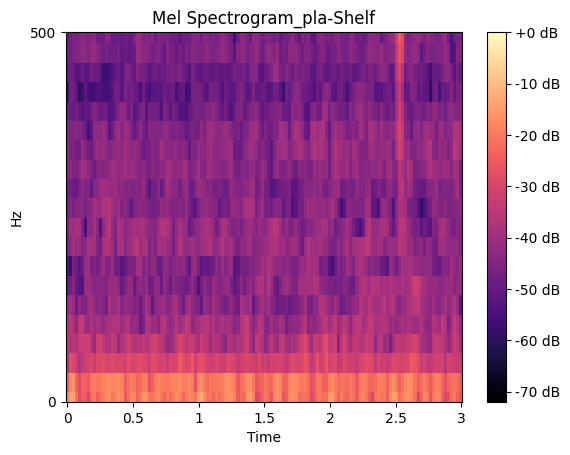

In [8]:
# パターンごとにスペクロログラムの描写
for patern in range(len(soundDataset)):
    trimData = soundDataset[patern,0]
    spectrogram = librosa.feature.melspectrogram(y=trimData, sr=sr)# スペクトログラムを計算
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max)\
                             , y_axis='mel', x_axis='time')# スペクトログラムを表示
    plt.colorbar(format='%+2.0f dB')# カラーバーを追加
    plt.ylim(0,500)
    plt.title('Mel Spectrogram_'+objLabel[patern])# グラフのタイトルを設定
    plt.show()# グラフを表示


# 特徴量抽出

In [9]:

# for i in range(soundDataset.shape[0]):
#     title = 'FFT_'+objectLabel[i]
#     #FFT
#     data = soundDataset[i][0] # checked data
#     win_wid = 4096
#     win_ham = np.blackman(win_wid)

#     #window幅で割り切れない分を削除する
#     if data.shape[0] % win_wid != 0:
#         data = data[0:-(data.shape[0] % win_wid)]



#     #overlap & split window 
#     overlap_rate = 0.5
#     overlap = int(win_wid*overlap_rate)
#     step = win_wid - overlap
#     frames = []
#     for start in range(0, len(data),step):
#         end = start + win_wid  # 'end'を定義
#         if end > len(data):
#             break
#         frame = data[start:end]
#         frames.append(frame)

#     #FFT
#     fft_ret = np.fft.rfft(frames * win_ham) #FFT
#     fft_freq = np.fft.rfftfreq(win_wid, 1/sr) #周波数軸のデータ作成

#     #transfer amp to log
#     log_fft_ret = 20*np.log10(np.abs(fft_ret)) # 対数データの取得←データを見やすくするため


#     #plot result
#     result_fft = np.mean(log_fft_ret, axis = 0)
#     plt.title(title)
#     plt.plot(fft_freq,result_fft)
#     plt.xlim(100,2000)
#     plt.ylim(-40,40)
#     # plt.savefig('data/figure_obj/'+title+'.pdf')
#     # plt.show()


In [10]:
# 特徴量の次元数
num_feature = 40

# 空のmfccSetを初期化
mfccSet = np.empty((0, num_feature))

# ループを使用してMFCCを抽出してmfccSetに追加
for pattern in range(soundDataset.shape[0]):
    for trial in range(soundDataset.shape[1]):
        # MFCCを計算
        mfccs = librosa.feature.mfcc(y=soundDataset[pattern][trial], sr=sr)
        
        # MFCCの各次元の平均を算出
        mean = mfccs.mean(axis=1)
        
        # MFCCの各次元の標準偏差を算出
        std = np.std(mfccs, axis=1)
        
        # mean, max_val, min_val, std をまとめた配列を作成
        combined_stats = np.concatenate([mean,  std])

        # mfccSetに追加
        mfccSet = np.append(mfccSet, [combined_stats], axis=0)

# 形状を確認
print(mfccSet.shape)


(1050, 40)


In [11]:
# 形状を確認
print(mfccSet.shape)
print(mfccs.shape)

(1050, 40)
(20, 130)


# データセット作成

In [12]:
import pandas as pd
# num_feature次元のMFCCのデータフレームを作成
Dataset = pd.DataFrame(data=mfccSet)


Dataset['objectNum'] = [i // soundDataset.shape[1] for i in range(mfccSet.shape[0])]
Dataset['matNum'] = np.repeat(matNum, 150)[:1050]
Dataset['shNum'] = np.repeat(shNum, 600)[:1050]

# データセットに'objectLabel'の列を追加
Dataset['object'] = np.repeat(objLabel, 50)[:1050]

# # データセットに'matLabel'の列を追加
Dataset['mat'] = np.repeat(matLabel, 150)[:1050]

# # データセットに'SHLabel'の列を追加
Dataset['sh'] = np.repeat(shLabel, 600)[:1050]




# Display the DataFrame
Dataset

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,objectNum,matNum,shNum,object,mat,sh
0,-478.001703,63.457280,36.144773,26.225528,16.727231,14.407245,13.285984,9.590793,9.811856,5.082892,...,3.645248,3.399917,3.804335,3.734329,0,0,0,y-shirt,clothing,soft
1,-476.196495,67.811489,42.117584,28.188400,15.583791,13.266734,12.080886,8.774526,8.174143,4.179097,...,3.640349,3.322606,3.285746,3.343535,0,0,0,y-shirt,clothing,soft
2,-477.773147,65.936731,41.942033,28.753131,17.348440,16.986556,15.279845,11.019433,9.088018,5.031381,...,3.156580,3.407280,3.517655,3.547526,0,0,0,y-shirt,clothing,soft
3,-482.200915,63.764375,39.955530,26.105635,15.753873,13.904783,13.131842,9.218075,7.482949,4.541441,...,3.725960,3.272637,3.092343,3.604951,0,0,0,y-shirt,clothing,soft
4,-479.097029,65.641729,40.932618,27.617450,16.556075,14.817480,14.321870,10.350258,8.893235,4.703604,...,3.328177,3.571923,3.805326,4.301650,0,0,0,y-shirt,clothing,soft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-462.453427,78.334440,45.349090,29.702114,15.009005,12.011045,13.299042,9.038196,6.716250,1.844909,...,3.297809,3.660277,3.493659,4.016997,20,6,1,pla-Shelf,plastic,hard
1046,-462.308041,79.059942,46.864514,30.124729,14.844601,12.301888,14.513218,10.563808,7.084634,1.905388,...,3.441372,3.365149,3.482850,4.577083,20,6,1,pla-Shelf,plastic,hard
1047,-461.417660,80.208434,46.588974,29.178092,14.371811,11.147610,12.965775,10.084192,7.170428,2.227163,...,3.539720,3.766647,4.083665,4.772348,20,6,1,pla-Shelf,plastic,hard
1048,-464.390102,76.848395,45.564795,31.331828,17.138878,14.709765,15.806167,10.320537,7.870815,3.794003,...,3.418645,3.032147,3.479765,4.267387,20,6,1,pla-Shelf,plastic,hard


In [13]:
! ls ../

NGC-DL-CONTAINER-LICENSE    dev    lib64   proc      srv  workspace
app			    etc    libx32  raw_data  sys
bin			    home   media   root      tmp
boot			    lib    mnt	   run	     usr
cuda-keyring_1.0-1_all.deb  lib32  opt	   sbin      var


In [14]:
# trial1 = Dataset.iloc[Dataset.index // 10 % 10 <= 4]
# trial2 = Dataset.iloc[Dataset.index // 10 % 10 > 4]

# 機械学習

In [15]:
#ライブラリ
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from numpy.random import default_rng
rng = default_rng(0)

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() # グラフ描画用
from sklearn.metrics import classification_report

import pandas as pd


               precision    recall  f1-score   support

   alumi-rack      0.896     0.860     0.878        50
     bedquilt      0.830     0.780     0.804        50
      blanket      0.852     0.920     0.885        50
    cardboard      0.661     0.740     0.698        50
        chair      0.826     0.760     0.792        50
        floor      0.771     0.740     0.755        50
        jeans      0.696     0.780     0.736        50
       laptop      1.000     0.960     0.980        50
   metal-desk      0.953     0.820     0.882        50
     mousepad      0.774     0.820     0.796        50
       pillow      0.780     0.780     0.780        50
     pla-Case      0.889     0.960     0.923        50
pla-Container      1.000     0.980     0.990        50
    pla-Shelf      0.961     0.980     0.970        50
         sofa      0.833     0.900     0.865        50
   sweatshirt      0.667     0.680     0.673        50
   thick-Book      0.915     0.860     0.887        50
    thin-

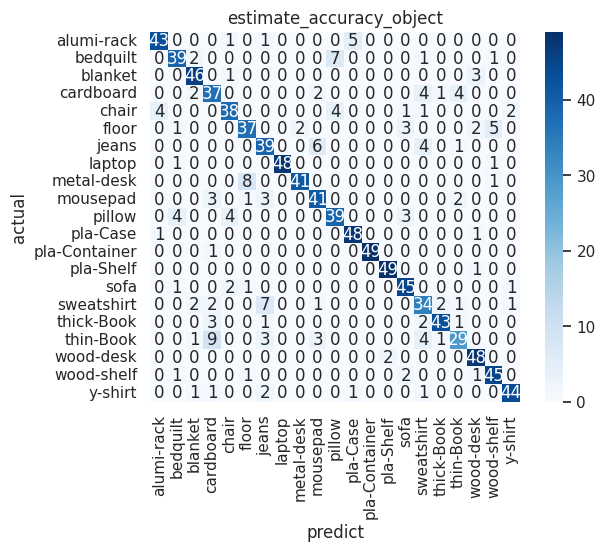

In [16]:
#object
model = svm.SVC(kernel="linear",C =0.01,random_state = 0) #機械学習アルゴリズムの選択

folds = 10
trainData = Dataset.iloc[:,1:num_feature]
label = Dataset.object
stratifiedkfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1) #10分割交差検証のパラメータ定義
score = cross_val_score(model, trainData,label, cv=stratifiedkfold)
pred = cross_val_predict(model, trainData,label, cv=stratifiedkfold)

cm = confusion_matrix(label,pred)
p = sns.heatmap(cm, square=True, cbar=True, annot=True,cmap='Blues',xticklabels=sorted(objLabel),yticklabels=sorted(objLabel))
title = "estimate_accuracy_object"
plt.title(title)
plt.xlabel('predict')
plt.ylabel('actual')
# plt.savefig('data/figure_obj/'+title+'.pdf', bbox_inches='tight')
print(classification_report(label, pred,digits=3))


              precision    recall  f1-score   support

     bedding      0.810     0.853     0.831       150
    clothing      0.828     0.867     0.847       150
 memory-foam      0.774     0.707     0.739       150
       metal      0.910     0.873     0.891       150
       paper      0.822     0.860     0.840       150
     plastic      0.946     0.927     0.936       150
        wood      0.880     0.880     0.880       150

    accuracy                          0.852      1050
   macro avg      0.853     0.852     0.852      1050
weighted avg      0.853     0.852     0.852      1050



Text(73.45000000000006, 0.5, 'actual')

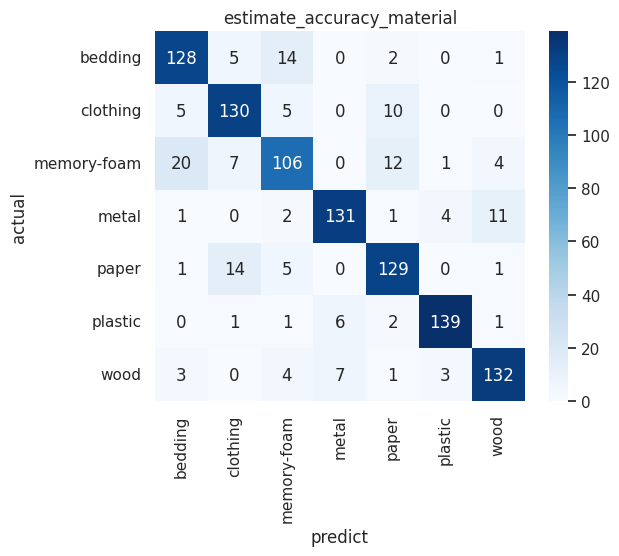

In [17]:
#material
#10分割交差検証
model = svm.SVC(kernel="linear",C =0.1,random_state = 0) #機械学習アルゴリズムの選択

folds = 10
trainData = Dataset.iloc[:,1:num_feature]
label = Dataset.mat
stratifiedkfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1) #10分割交差検証のパラメータ定義
score = cross_val_score(model, trainData,label, cv=stratifiedkfold)
pred = cross_val_predict(model, trainData,label, cv=stratifiedkfold)

print(classification_report(label, pred,digits=3))

cm = confusion_matrix(label,pred)
p = sns.heatmap(cm, square=True, cbar=True, annot=True,fmt="d",cmap='Blues',xticklabels=sorted(set(matLabel)),yticklabels=sorted(set(matLabel)))
title = "estimate_accuracy_material"
plt.title(title)
plt.xlabel('predict')
plt.ylabel('actual')
# plt.savefig('data/figure_obj/'+title+'.pdf', bbox_inches='tight')

## 特徴量空間の可視化

NameError: name 'objectLabel' is not defined

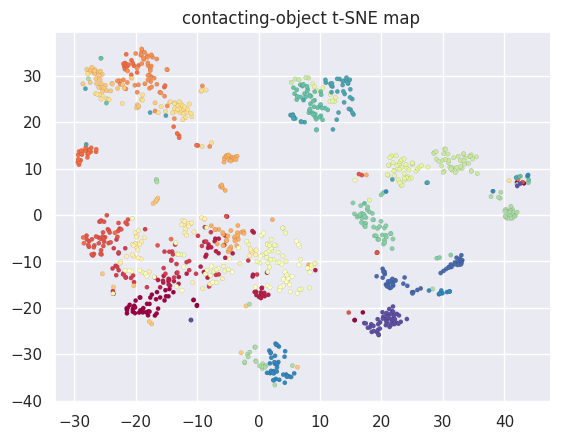

In [18]:
from sklearn.preprocessing import LabelEncoder

# t-SNE 特徴量空間上での可視化
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    random_state=rng.integers(10000),
)
X_tsne = tsne.fit_transform(Dataset.iloc[:,1:num_feature])

# プロット
title = "contacting-object t-SNE map "
plt.title(title)

scatter=plt.scatter(
            X_tsne[:, 0], 
            X_tsne[:, 1], 
            c=Dataset['objectNum'], 
            cmap='Spectral',
            edgecolor='black',
            linewidths=0.05,
            s=10 
        )  

# 凡例を追加
plt.legend(handles=scatter.legend_elements(num=21)[0],labels=objectLabel,bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

# plt.savefig("../app/data/figure_obj/"+title+".pdf")

# EfficientATのファインチューニング

### torchデータセットの作成

In [19]:
# パターンごとにスペクロログラムの保存
df = []
trial_num = 50
for patern in range (len(soundDataset)):
    for trial in range(trial_num):
        trimData = soundDataset[patern,trial]
        spectrogram = librosa.feature.melspectrogram(y=trimData, sr=sr)# スペクトログラムを計算
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)    
        df.append(spectrogram_db)

df = np.array(df)
print(df.shape)
print(type(df))

(1050, 128, 130)
<class 'numpy.ndarray'>


### soft-hard 1

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:

# ラベルの指定
t_df = Dataset.shNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

torch.Size([1050, 1, 128, 130])
525 262 263
[tensor([[[[-15.7372, -12.7907, -12.2806,  ..., -16.2258, -12.1957, -14.6959],
          [-15.7418, -11.8346, -11.9373,  ..., -12.7932, -11.7111, -12.4843],
          [-22.5785, -21.3953, -21.5793,  ..., -20.6679, -21.5296, -17.3727],
          ...,
          [-58.1976, -55.0280, -55.0888,  ..., -53.4471, -52.7718, -53.7474],
          [-56.4661, -53.7698, -54.6103,  ..., -54.0908, -53.9045, -56.2288],
          [-57.3117, -54.9557, -55.6911,  ..., -54.7845, -54.3604, -56.0656]]],


        [[[ -5.8755,  -1.3352,   0.0000,  ...,  -8.2323,  -7.3307,  -8.7717],
          [ -7.0860,  -4.6320,  -2.7805,  ...,  -6.8078,  -5.4152,  -6.6856],
          [-14.4937, -18.4999, -18.0805,  ..., -15.1023, -14.4274, -11.6789],
          ...,
          [-50.1694, -46.3330, -44.8377,  ..., -47.9001, -46.6421, -47.7369],
          [-49.2638, -46.9567, -46.7122,  ..., -46.9204, -46.5079, -49.3187],
          [-46.9555, -45.9099, -47.1923,  ..., -47.8846, -48.97

In [22]:
# modelのインポート
from models.dymn.model import get_model as get_dymn
model = get_dymn(pretrained_name="dymn10_as")

#パラメータの更新を許可
for param in model.parameters():
    param.requires_gred = True


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
model.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=527, bias=True),
    nn.Linear(in_features=527, out_features=176, bias=True),  # 新しい層
    nn.Linear(in_features=176, out_features=2, bias=True)  # 新しい層

)
print(model)

DyMN(
  (layers): ModuleList(
    (0): DY_Block(
      (exp_conv): DynamicWrapper(
        (module): Identity()
      )
      (exp_norm): Identity()
      (exp_act): DynamicWrapper(
        (module): Identity()
      )
      (depth_conv): DynamicConv(
        (residuals): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
        )
      )
      (depth_norm): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (depth_act): DyReLUB(
        (coef_net): Sequential(
          (0): Linear(in_features=32, out_features=64, bias=True)
        )
        (sigmoid): Sigmoid()
      )
      (ca): CoordAtt()
      (proj_conv): DynamicConv(
        (residuals): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
        )
      )
      (proj_norm): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (context_gen): ContextGen(
        (joint_conv): Conv2d(16, 32, kernel_size=(1, 1

/opt/conda/lib/python3.10/site-packages/torchvision/ops/misc.py:120: UserWarning: Don't use ConvNormActivation directly, please use Conv2dNormActivation and Conv3dNormActivation instead.
  warnings.warn(


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
max_epoch = 15
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net1 = model.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net1.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

# 学習ループ
for epoch in range(max_epoch):
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net1.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net1(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net1.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net1(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')

shModel_trained = net1


cuda:0
Epoch [1/15], Train Loss: 0.6765, Validation Loss: 1.4967
Epoch [2/15], Train Loss: 0.6678, Validation Loss: 1.4907
Epoch [3/15], Train Loss: 0.6636, Validation Loss: 1.2776
Epoch [4/15], Train Loss: 0.6530, Validation Loss: 1.5156
Epoch [5/15], Train Loss: 0.6083, Validation Loss: 2.1670
Epoch [6/15], Train Loss: 0.3566, Validation Loss: 3.3553
Epoch [7/15], Train Loss: 0.1824, Validation Loss: 1.2475
Epoch [8/15], Train Loss: 0.1198, Validation Loss: 0.8815
Epoch [9/15], Train Loss: 0.0777, Validation Loss: 0.3370
Epoch [10/15], Train Loss: 0.0998, Validation Loss: 0.2809
Epoch [11/15], Train Loss: 0.0659, Validation Loss: 0.3995
Epoch [12/15], Train Loss: 0.0359, Validation Loss: 0.0759
Epoch [13/15], Train Loss: 0.0290, Validation Loss: 0.1744
Epoch [14/15], Train Loss: 0.0194, Validation Loss: 0.2990
Epoch [15/15], Train Loss: 0.0166, Validation Loss: 0.1135


In [24]:
shModel_trained = net1


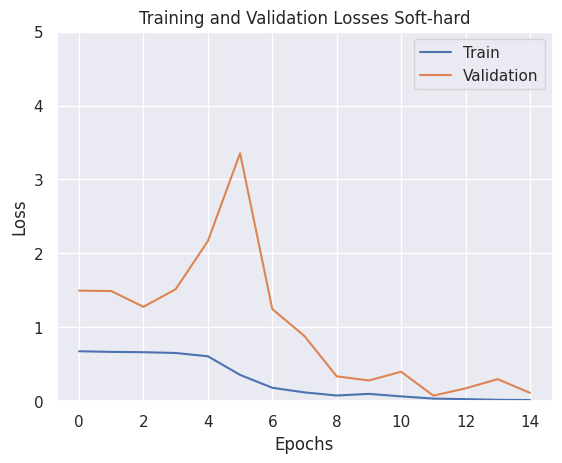

In [25]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Soft-hard'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,False)

In [26]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net1(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)


Accuracy: 96.4%
Accuracy: 96.4%


tensor(0.9636)

In [27]:
# from models.dymn.model import get_model as get_dymn
# dymn10 = get_dymn(pretrained_name="dymn10_as")

# DataLoder(df,Dataset.matNum,25)
# FineTune(dymn10,5,1280,6)
# print(dymn10)
# TrainVall(dymn10,train_loader,val_loader,8)

# ShowTrainLoss(train_losses,val_losses,False)
# calc_acc(FineTune.net,val_loader)
# calc_acc(net,test_loader)

### material 1

In [28]:
# ラベルの指定
t_df = Dataset.matNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

torch.Size([1050, 1, 128, 130])
525 262 263
[tensor([[[[-15.7372, -12.7907, -12.2806,  ..., -16.2258, -12.1957, -14.6959],
          [-15.7418, -11.8346, -11.9373,  ..., -12.7932, -11.7111, -12.4843],
          [-22.5785, -21.3953, -21.5793,  ..., -20.6679, -21.5296, -17.3727],
          ...,
          [-58.1976, -55.0280, -55.0888,  ..., -53.4471, -52.7718, -53.7474],
          [-56.4661, -53.7698, -54.6103,  ..., -54.0908, -53.9045, -56.2288],
          [-57.3117, -54.9557, -55.6911,  ..., -54.7845, -54.3604, -56.0656]]],


        [[[ -5.8755,  -1.3352,   0.0000,  ...,  -8.2323,  -7.3307,  -8.7717],
          [ -7.0860,  -4.6320,  -2.7805,  ...,  -6.8078,  -5.4152,  -6.6856],
          [-14.4937, -18.4999, -18.0805,  ..., -15.1023, -14.4274, -11.6789],
          ...,
          [-50.1694, -46.3330, -44.8377,  ..., -47.9001, -46.6421, -47.7369],
          [-49.2638, -46.9567, -46.7122,  ..., -46.9204, -46.5079, -49.3187],
          [-46.9555, -45.9099, -47.1923,  ..., -47.8846, -48.97

In [30]:
matModel = shModel_trained

#パラメータの更新を許可
for param in matModel.parameters():
    param.requires_gred = True


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
matModel.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=527, bias=True),
    nn.Linear(in_features=527, out_features=176, bias=True),  # 新しい層
    nn.Linear(in_features=176, out_features=6, bias=True)  # 新しい層

)
print(matModel)

DyMN(
  (layers): ModuleList(
    (0): DY_Block(
      (exp_conv): DynamicWrapper(
        (module): Identity()
      )
      (exp_norm): Identity()
      (exp_act): DynamicWrapper(
        (module): Identity()
      )
      (depth_conv): DynamicConv(
        (residuals): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
        )
      )
      (depth_norm): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (depth_act): DyReLUB(
        (coef_net): Sequential(
          (0): Linear(in_features=32, out_features=64, bias=True)
        )
        (sigmoid): Sigmoid()
      )
      (ca): CoordAtt()
      (proj_conv): DynamicConv(
        (residuals): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
        )
      )
      (proj_norm): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (context_gen): ContextGen(
        (joint_conv): Conv2d(16, 32, kernel_size=(1, 1

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
max_epoch = 15
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net2 = matModel.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net2.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

# 学習ループ
for epoch in range(max_epoch):
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net2.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net2(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net2.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net2(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')


matModel_trained = net2


cuda:0


/opt/conda/conda-bld/pytorch_1711403380909/work/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1711403380909/work/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [5,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1711403380909/work/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [6,0,0] Assertion `t >= 0 && t < n_classes` failed.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Material'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,True)

In [ ]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net2(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)

### object 1

In [ ]:
# ラベルの指定
t_df = Dataset.objectNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

In [ ]:
objModel = matModel_trained

#パラメータの更新を許可
for param in objModel.parameters():
    param.requires_gred = True


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
objModel.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=527, bias=True),
    nn.Linear(in_features=527, out_features=176, bias=True),  # 新しい層
    nn.Linear(in_features=176, out_features=21, bias=True)  # 新しい層

)
print(objModel)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
max_epoch = 150
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net3 = objModel.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net3.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

# 学習ループ
for epoch in range(max_epoch):
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net3.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net3(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net3.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net3(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')


objModel_trained = net3


In [ ]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Object'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,True)

In [ ]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net3(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)

### soft-hard 2

In [ ]:
# ラベルの指定
t_df = Dataset.shNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

In [ ]:
shModel_2 = objModel_trained

#パラメータの更新を許可
for param in shModel_2.parameters():
    param.requires_gred = False


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
shModel_2.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=False),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=527, bias=False),
    nn.Linear(in_features=527, out_features=176, bias=False),  # 新しい層
    nn.Linear(in_features=176, out_features=21, bias=False),  # 新しい層
    nn.ReLU(),
    nn.Linear(in_features=21, out_features=2, bias=True),  # 新しい層


)
print(shModel_2)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
max_epoch = 50
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net4 = shModel_2.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net4.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

# 学習ループ
for epoch in range(max_epoch):
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net4.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net4(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net4.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net4(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')

shModel_2_trained = net4


In [ ]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Soft-hard'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,False)

In [ ]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net4(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)


### material 2

In [ ]:
# ラベルの指定
t_df = Dataset.matNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

In [ ]:
matModel_2 = shModel_2_trained

#パラメータの更新を許可
for param in matModel_2.parameters():
    param.requires_gred = False


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
matModel_2.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=False),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=527, bias=False),
    nn.Linear(in_features=527, out_features=176, bias=False),  # 新しい層
    nn.Linear(in_features=176, out_features=21, bias=False),  # 新しい層
    nn.ReLU(),
    nn.Linear(in_features=21, out_features=6, bias=True),  # 新しい層
    # nn.ReLU(),
    # nn.Linear(in_features=2, out_features=21, bias=True),  # 新しい層
    # nn.ReLU(),
    # nn.Linear(in_features=21, out_features=6, bias=True),  # 新しい層
)
print(matModel_2)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
epoch = 0
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net5 = matModel_2.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net5.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

# 学習ループ
# for epoch in range(max_epoch):
train_epoch_loss = 1.0
val_epoch_loss = 1.0

while train_epoch_loss > 0.1 or val_epoch_loss  > 0.1 or epoch<50:
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net5.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net5(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net5.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net5(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')
    epoch+=1

matModel_2_trained = net5


In [ ]:
matModel_2_trained = net5


In [ ]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Material'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,True)

In [ ]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net5(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)

### object 2

In [ ]:
# ラベルの指定
t_df = Dataset.objectNum

# テンソル形式に変換
df_tenosor = torch.tensor(df, dtype=torch.float32)
df_tenosor = torch.unsqueeze(df_tenosor, 1)
label_tensor = torch.tensor(t_df, dtype=torch.int64)
print(df_tenosor.size())

# x と t を組み合わせて TensorDataset を作成
dataset = torch.utils.data.TensorDataset(df_tenosor, label_tensor)

# 各データセットのサンプル数を決定
# train : val: test = 50%　: 25% : 25%
n_train = int(len(dataset) * 0.5)
n_val = int(len(dataset) * 0.25)
n_test = len(dataset) - n_train - n_val
     
# それぞれのサンプル数を確認
print(n_train, n_val, n_test)

# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

# バッチサイズ
batch_size = 25

      
# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

print(train_loader)

for batch in train_loader:
    print(batch)

In [ ]:
objModel_2 = matModel_2_trained

#パラメータの更新を許可
for param in objModel_2.parameters():
    param.requires_gred = False


# print(model.classifier)

# 出力層の最後だけ変更
# model.classifier[5] = torch.nn.Linear(1280,2)
objModel_2.classifier= nn.Sequential(
    nn.AdaptiveAvgPool2d(output_size=1),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=960, out_features=1280, bias=False),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=527, bias=False),
    nn.Linear(in_features=527, out_features=176, bias=False), 
    nn.Linear(in_features=176, out_features=21, bias=False), 
    nn.ReLU(),
    nn.Linear(in_features=21, out_features=2, bias=False), 
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=21, bias=False),  
    nn.ReLU(),
    nn.Linear(in_features=21, out_features=6, bias=False),  
    nn.ReLU(),
    nn.Linear(in_features=6, out_features=21, bias=True),  # 新しい層
    nn.ReLU(),
    nn.Linear(in_features=21, out_features=21, bias=True),  # 新しい層
)
print(objModel_2)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# エポックの数
epoch = 0
     
# モデルの初期化
torch.manual_seed(0)

# GPU の設定状況に基づいたデバイスの選択
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
# モデルのインスタンス化とデバイスへの転送
net6 = objModel_2.cuda()

criterion = F.cross_entropy
  
# 最適化手法の選択
optimizer = torch.optim.SGD(net6.parameters(), lr=0.1)
# エポックごとの訓練データの損失と検証データの損失を保存するリスト
train_losses = []
val_losses = []

train_epoch_loss = 1.0
val_epoch_loss = 1.0
# 学習ループ
while (train_epoch_loss > 0.1 or val_epoch_loss  > 0.2 )or epoch<100:
    train_epoch_loss = 0.0
    val_epoch_loss = 0.0
    
    # 訓練データでの学習
    net6.train()
    for batch in train_loader:
        x, t = batch
        x = x.to(device)
        t = t.to(device)
        optimizer.zero_grad()
        y = net6(x)
        loss = criterion(y[0], t)
        train_epoch_loss += loss.item()  # エポック全体の訓練データの損失に加算
        loss.backward()
        optimizer.step()
    
    # 訓練データでのエポックごとの平均損失を計算し保存
    train_epoch_loss /= len(train_loader)
    train_losses.append(train_epoch_loss)
    
    # 検証データでの評価
    net6.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, t = batch
  
            x = x.to(device)
            t = t.to(device)
            y = net6(x)
            loss = criterion(y[0], t)
            val_epoch_loss += loss.item()  # エポック全体の検証データの損失に加算
       
    # 検証データでのエポックごとの平均損失を計算し保存
    val_epoch_loss /= len(val_loader)
    val_losses.append(val_epoch_loss)
    
    # エポックごとに損失を表示
    print(f'Epoch [{epoch+1}/{max_epoch}], Train Loss: {train_epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}')
    epoch+=1

objModel_2_trained = net6


In [ ]:
from datetime import datetime
import pytz
def ShowTrainLoss(train_losses,val_losses,save):
    # 日本時間のタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')

    # 現在の日本時間を取得
    now = datetime.now(jst)

    # 時刻を指定された形式の文字列に変換
    time = "_"+now.strftime("%Y%m%d%H%M")

    # 学習曲線の可視化

    title = 'Training and Validation Losses Material'
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0,5)
    plt.legend()
    if save == True:
        plt.savefig("data/"+title+time+".pdf")

    plt.show()

ShowTrainLoss(train_losses,val_losses,True)

In [ ]:

# dim=1 で行ごとの最大値に対する要素番号を取得（dim=0 は列ごと）
y_label = torch.argmax(y[0], dim=1)
# 予測値から最大となるクラスの番号を取り出した結果
y_label
# 目的変数
t
# 値が一致しているか確認
y_label == t
# int => float 
torch.sum(y_label == t) * 1.0
# 正解率
acc = torch.sum(y_label == t) * 1.0 / len(t)
acc


# 正解率の計算
def calc_acc(data_loader):
    
    with torch.no_grad():
        
        accs = [] # 各バッチごとの結果格納用
        
        for batch in data_loader:
            x, t = batch
            
            # x = torch.unsqueeze(x,1)
            
            x = x.to(device)
            t = t.to(device)
            y = net6(x)
            
            y_label = torch.argmax(y[0], dim=1)
            acc = torch.sum(y_label == t) * 1.0 / len(t)
            accs.append(acc)
            
    # 全体の平均を算出
    avg_acc = torch.tensor(accs).mean()
    print('Accuracy: {:.1f}%'.format(avg_acc * 100))
    
    return avg_acc
      
# 検証データで確認
calc_acc(val_loader)
# テストデータで確認
calc_acc(test_loader)